# 3.1 Model development:

The purpose of this task is to implement three different prediction models for the power output by each inverter under the given environmental conditions. We have selected the following prediction models for the analysis:

Liner regression
Lasso regression
Neural networks

The results of the prediction models will be compared to identify which models predict the results closer to the actual values

Following are the steps for model development:
i)	Data preparation & feature engineering: this stage involves the selection of features and management of data
ii)	Model implementation: this stage is about the training and testing of model

## 3.1.1 data integration
The datasets are merged based on the time stamps for the analysis

Data import

In [1]:
import pandas as pd

df_merged=pd.read_csv(r"C:\Users\b.yasser\Desktop\ML_coursework\data\processed\plants_combined_data.csv")


Data analysis:
Data is analysed to check the range of values in the dataset for analysis


We have plotted the range of values against the frequency to check the consistency of the data. By plotting, we realised that most of the values are in the 0-100 range. Further investigation revealed that there are many values which are zero

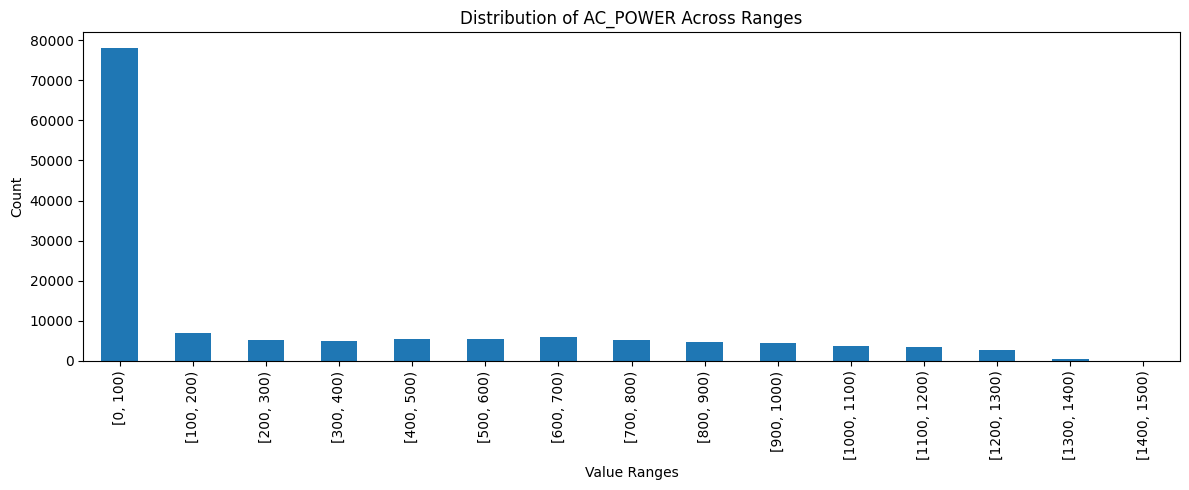

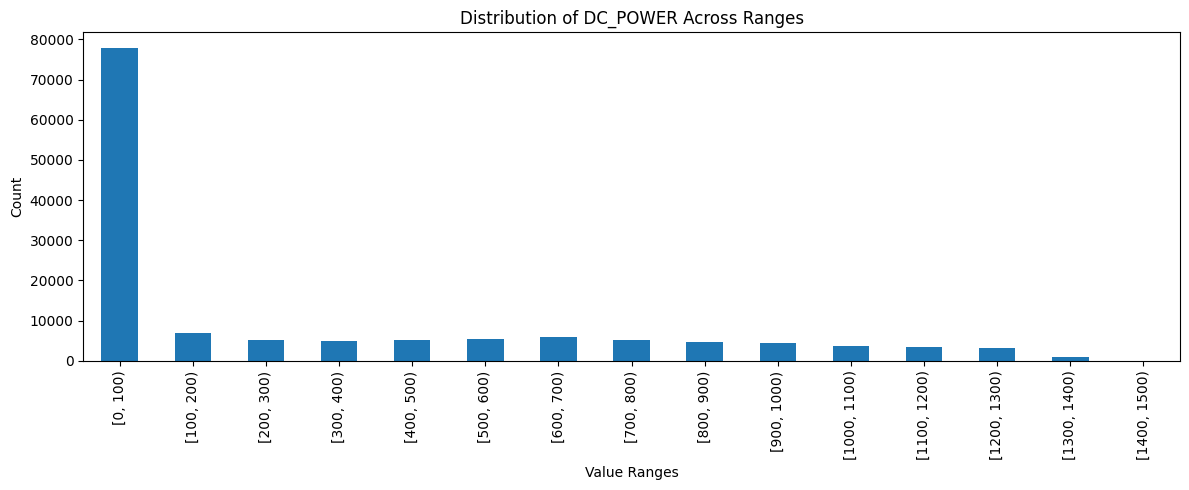

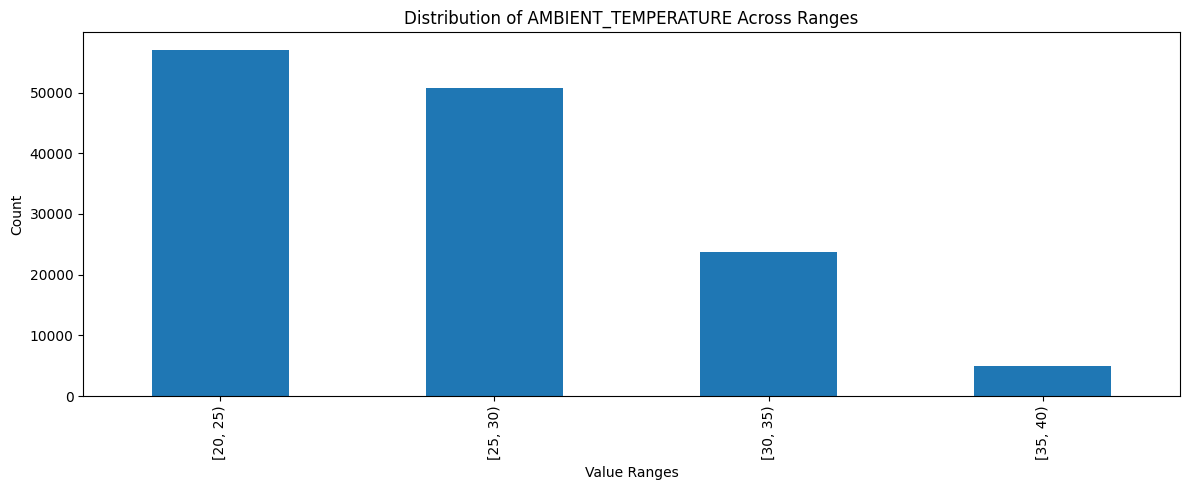

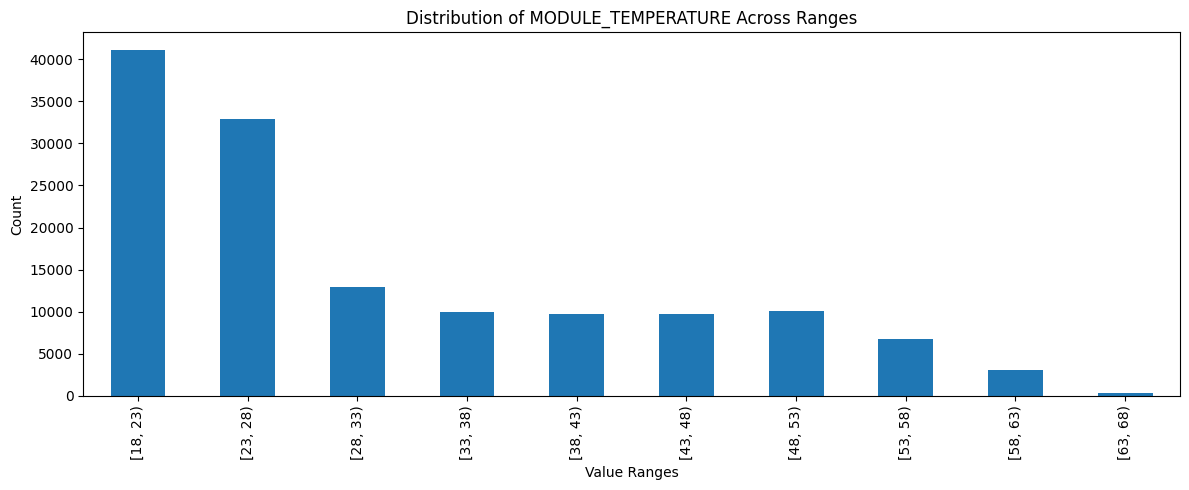

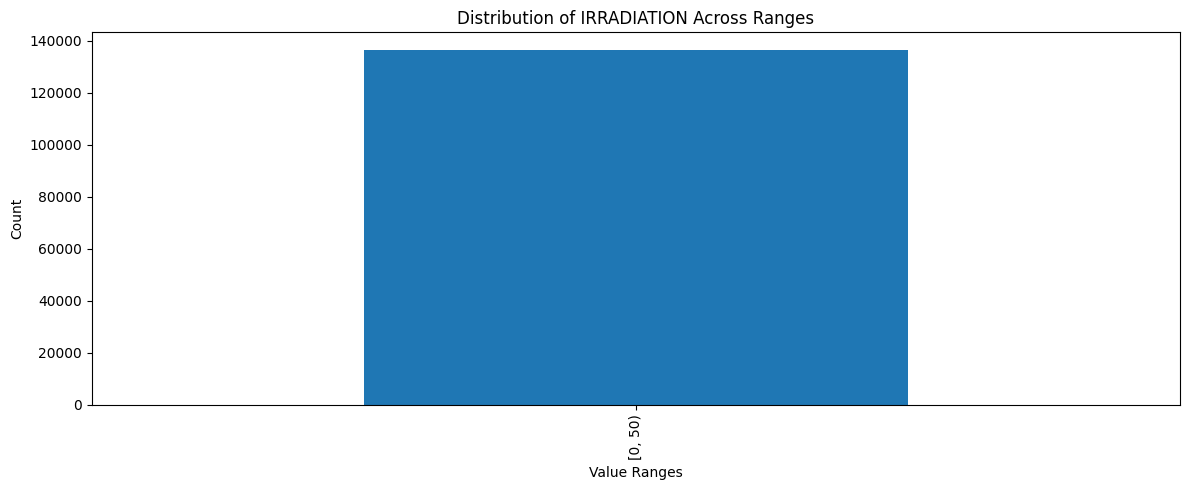

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Function for power columns
def plot_power_bins(df, column_name, bin_size=100):
    # Compute bins
    bins = list(range(0, int(df[column_name].max()) + bin_size, bin_size))
    
    # Use pd.cut but don't assign to dataframe
    bin_series = pd.cut(df[column_name], bins=bins, right=False)
    
    # Count values
    bin_counts = bin_series.value_counts().sort_index()
    
    # Plot
    plt.figure(figsize=(12,5))
    bin_counts.plot(kind='bar')
    plt.title(f"Distribution of {column_name} Across Ranges")
    plt.xlabel("Value Ranges")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Example usage
plot_power_bins(df_merged, "AC_POWER")
plot_power_bins(df_merged, "DC_POWER")


# Function for weather features
def plot_binned_feature(df, column_name, bin_size):
    # Compute bins without modifying df
    bins = list(range(int(df[column_name].min()),
                      int(df[column_name].max()) + bin_size,
                      bin_size))
    
    bin_series = pd.cut(df[column_name], bins=bins, right=False)
    bin_counts = bin_series.value_counts().sort_index()
    
    plt.figure(figsize=(12,5))
    bin_counts.plot(kind='bar')
    plt.title(f"Distribution of {column_name} Across Ranges")
    plt.xlabel("Value Ranges")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Example usage
plot_binned_feature(df_merged, "AMBIENT_TEMPERATURE", 5)
plot_binned_feature(df_merged, "MODULE_TEMPERATURE", 5)
plot_binned_feature(df_merged, "IRRADIATION", 50)


the NaN and zero values are dropped from the dataset and the range against frequecy are plotted again

In [3]:
# Remove rows where AC_POWER or DC_POWER are zero
df_merged = df_merged[(df_merged["AC_POWER"] != 0) & (df_merged["DC_POWER"] != 0)]

df_merged.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Operating_Condition,AMBIENT_TEMPERATURE,IRRADIATION,MODULE_TEMPERATURE
510,2020-05-15 06:00:00,4135001,1BY6WEcLGh8j5v7,3.714286,3.585714,3.585714,6.259563e+06,Suboptimal,24.088446,0.005887,22.206757
511,2020-05-15 06:00:00,4135001,1IF53ai7Xc0U56Y,5.350000,5.162500,5.162500,6.183650e+06,Suboptimal,24.088446,0.005887,22.206757
512,2020-05-15 06:00:00,4135001,3PZuoBAID5Wc2HD,5.800000,5.585714,5.585714,6.987765e+06,Suboptimal,24.088446,0.005887,22.206757
513,2020-05-15 06:00:00,4135001,7JYdWkrLSPkdwr4,5.842857,5.628571,5.628571,7.602966e+06,Suboptimal,24.088446,0.005887,22.206757
514,2020-05-15 06:00:00,4135001,McdE0feGgRqW7Ca,5.437500,5.250000,5.250000,7.158969e+06,Suboptimal,24.088446,0.005887,22.206757


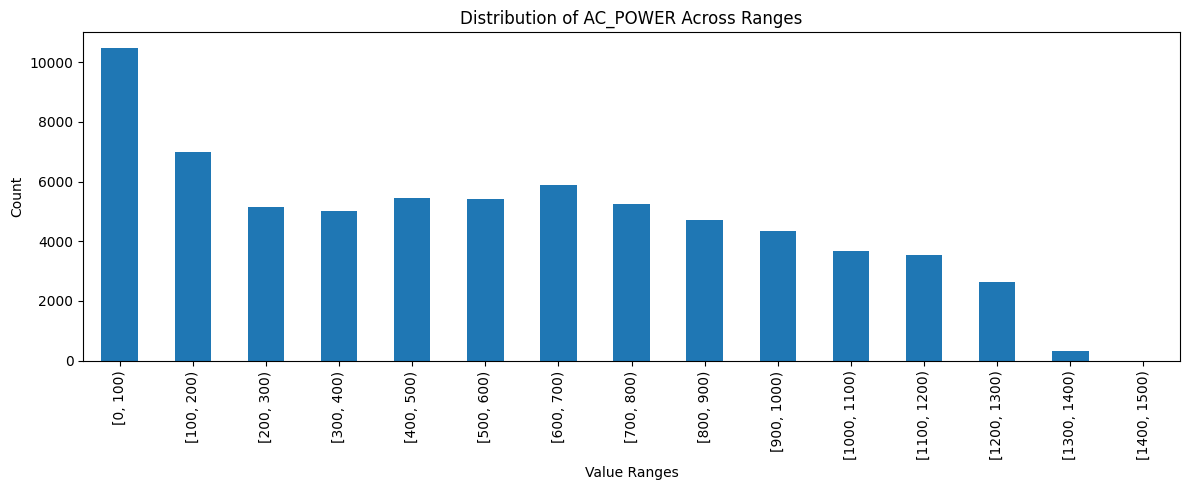

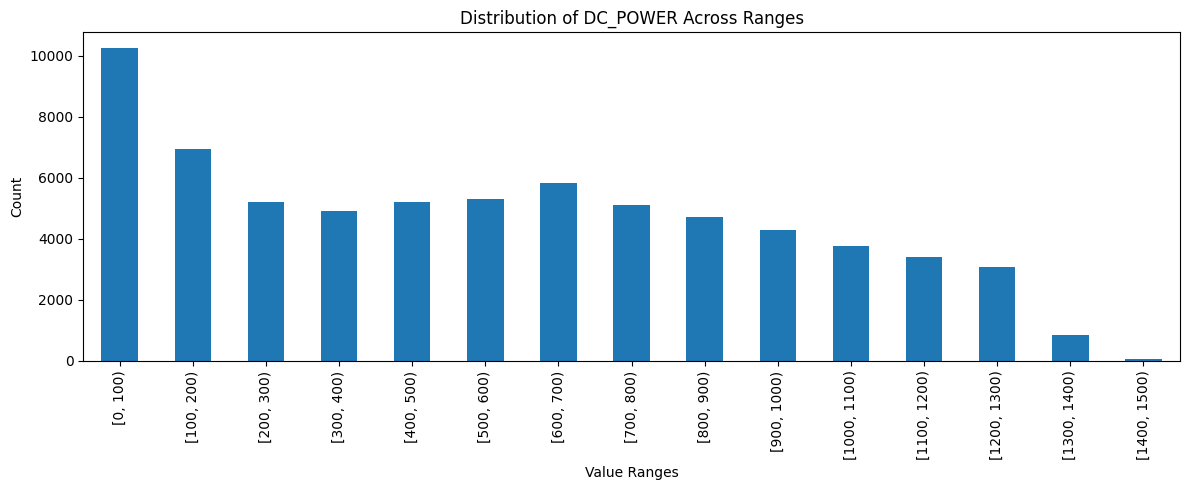

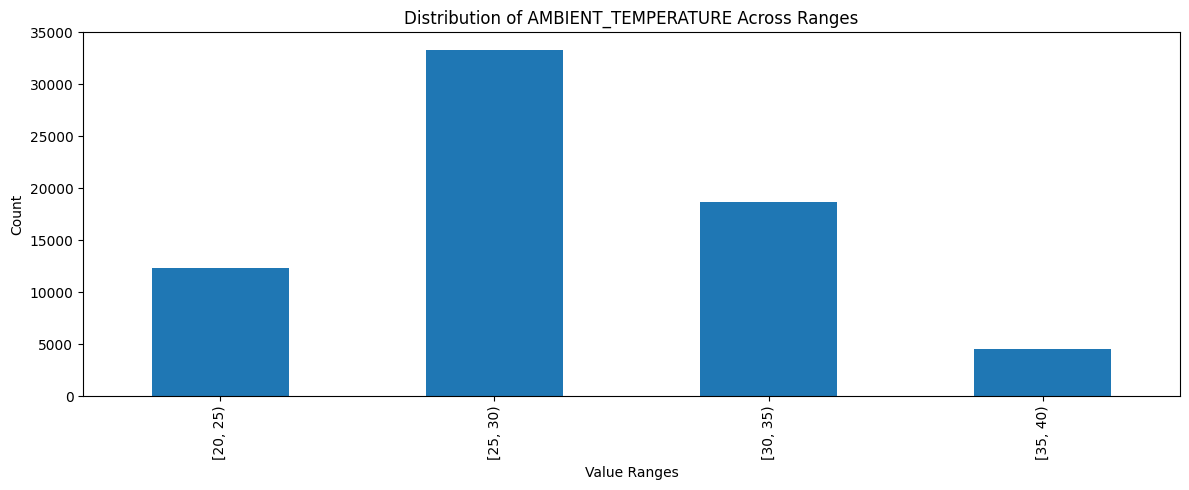

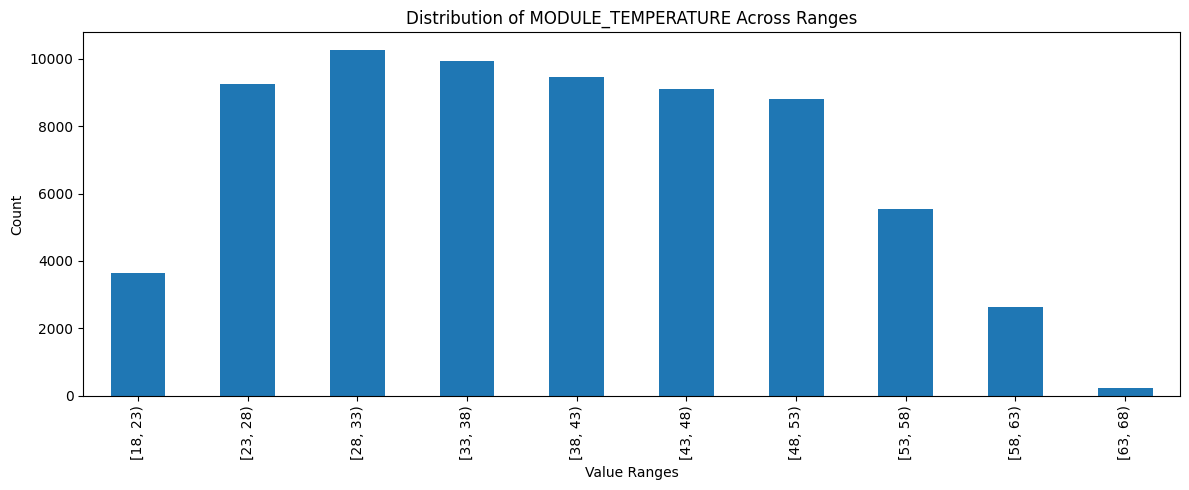

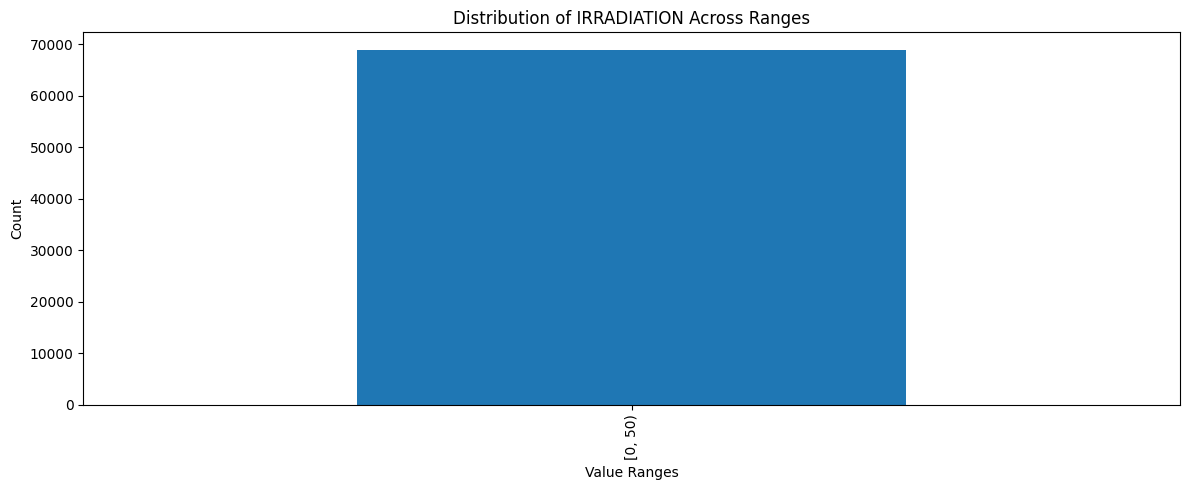

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Function for power columns
def plot_power_bins(df, column_name, bin_size=100):
    # Compute bins
    bins = list(range(0, int(df[column_name].max()) + bin_size, bin_size))
    
    # Use pd.cut but don't assign to dataframe
    bin_series = pd.cut(df[column_name], bins=bins, right=False)
    
    # Count values
    bin_counts = bin_series.value_counts().sort_index()
    
    # Plot
    plt.figure(figsize=(12,5))
    bin_counts.plot(kind='bar')
    plt.title(f"Distribution of {column_name} Across Ranges")
    plt.xlabel("Value Ranges")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Example usage
plot_power_bins(df_merged, "AC_POWER")
plot_power_bins(df_merged, "DC_POWER")


# Function for weather features
def plot_binned_feature(df, column_name, bin_size):
    # Compute bins without modifying df
    bins = list(range(int(df[column_name].min()),
                      int(df[column_name].max()) + bin_size,
                      bin_size))
    
    bin_series = pd.cut(df[column_name], bins=bins, right=False)
    bin_counts = bin_series.value_counts().sort_index()
    
    plt.figure(figsize=(12,5))
    bin_counts.plot(kind='bar')
    plt.title(f"Distribution of {column_name} Across Ranges")
    plt.xlabel("Value Ranges")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Example usage
plot_binned_feature(df_merged, "AMBIENT_TEMPERATURE", 5)
plot_binned_feature(df_merged, "MODULE_TEMPERATURE", 5)
plot_binned_feature(df_merged, "IRRADIATION", 50)


the two datasets are merged in a single dataframe for analysis. The timestamp is used to merge the data.
We see that the data we have for the power generation has a range from January to December of the year 2020. However, there is alot of missing data. The data of not all of the days of the month is available. for example, for January we have only the data for the day 6 of the month.
Furthermore, we only have the data for some days of the months of May and June only for the weather sensor. 
We can only relate the power outputs of the months for which the weather sensor information is available for the training of models


The zero values in the weather dataset are dropped

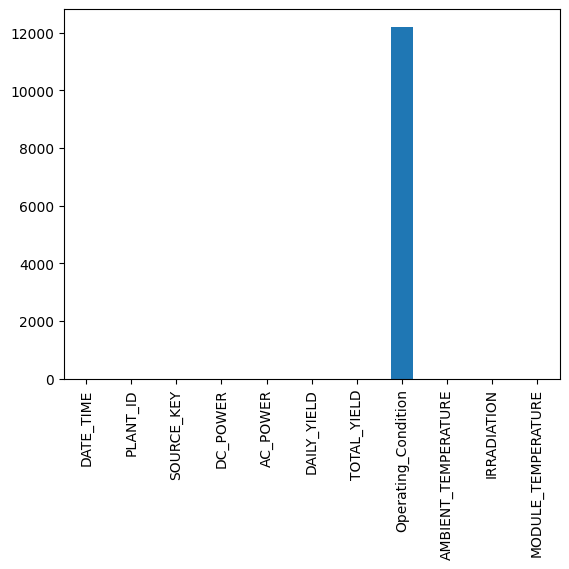

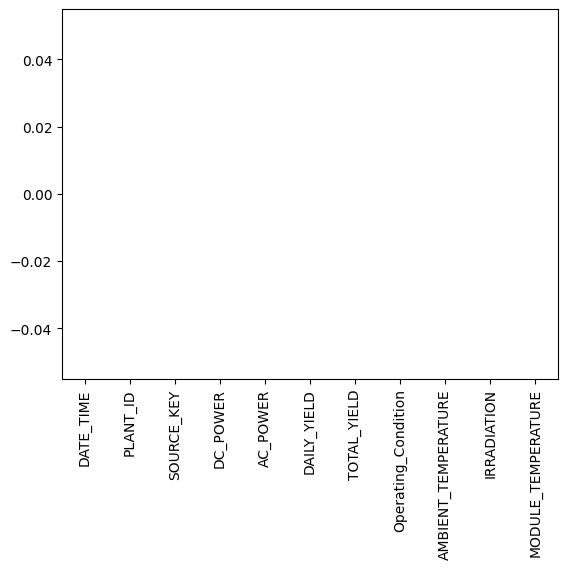

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Operating_Condition,AMBIENT_TEMPERATURE,IRRADIATION,MODULE_TEMPERATURE
510,2020-05-15 06:00:00,4135001,1BY6WEcLGh8j5v7,3.714286,3.585714,3.585714,6.259563e+06,Suboptimal,24.088446,0.005887,22.206757
511,2020-05-15 06:00:00,4135001,1IF53ai7Xc0U56Y,5.350000,5.162500,5.162500,6.183650e+06,Suboptimal,24.088446,0.005887,22.206757
512,2020-05-15 06:00:00,4135001,3PZuoBAID5Wc2HD,5.800000,5.585714,5.585714,6.987765e+06,Suboptimal,24.088446,0.005887,22.206757
513,2020-05-15 06:00:00,4135001,7JYdWkrLSPkdwr4,5.842857,5.628571,5.628571,7.602966e+06,Suboptimal,24.088446,0.005887,22.206757
514,2020-05-15 06:00:00,4135001,McdE0feGgRqW7Ca,5.437500,5.250000,5.250000,7.158969e+06,Suboptimal,24.088446,0.005887,22.206757


In [5]:
import pandas as pd


import matplotlib.pyplot as plt
df_merged.isna().sum().plot(kind="bar")
plt.show()

df_merged=df_merged.dropna()
df_merged.isna().sum().plot(kind="bar")
plt.show()
df_merged.head(5)





## 3.1.2 feature selection
The DC power output is that target variable whereas the AMBIENT TEMPERATURE, MODULE TEMPERATURE and IRRADIATION are the parameters

Model training and evaluation: Linear Regression

R² score: 0.9235140047358983
MSE: 11187.755145274485
               Feature  Coefficient
0  AMBIENT_TEMPERATURE    -0.583565
1   MODULE_TEMPERATURE     2.205592
2          IRRADIATION  1195.843293
Intercept: -10.126668692704357


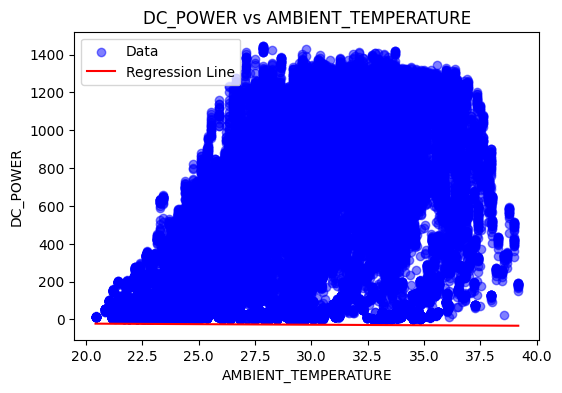

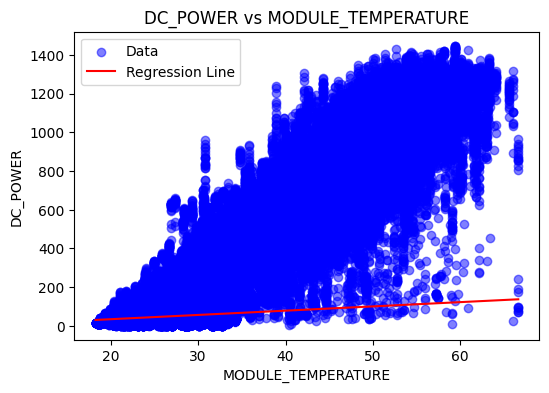

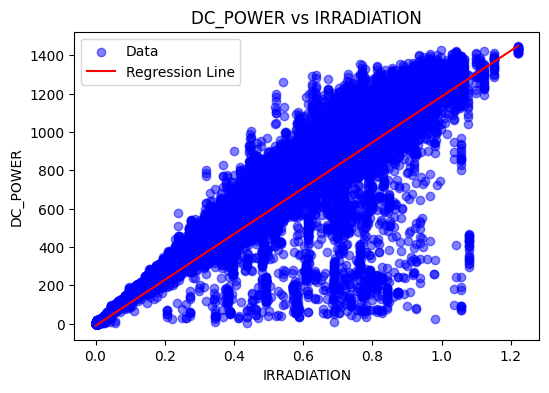

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


# -----------------------------
# 2. Select features + target
# -----------------------------
X = df_merged[["AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION"]]
y = df_merged["DC_POWER"]

# -----------------------------
# 3. Train–test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 4. Create and train model
# -----------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -----------------------------
# 5. Predictions
# -----------------------------
y_pred = model.predict(X_test)

# -----------------------------
# 6. Evaluation
# -----------------------------
print("R² score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# -----------------------------
# 7. Model coefficients
# -----------------------------
coeff_table = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print(coeff_table)
print("Intercept:", model.intercept_)

# -----------------------------
# 8. Scatter plots with regression lines
# -----------------------------
for feature in X.columns:
    plt.figure(figsize=(6,4))
    
    # Scatter plot
    plt.scatter(df_merged[feature], df_merged["DC_POWER"], color='blue', alpha=0.5, label="Data")
    
    # Regression line
    coef = model.coef_[X.columns.get_loc(feature)]
    intercept = model.intercept_
    x_vals = np.linspace(df_merged[feature].min(), df_merged[feature].max(), 100)
    y_vals = coef * x_vals + intercept
    plt.plot(x_vals, y_vals, color='red', label="Regression Line")
    
    plt.xlabel(feature)
    plt.ylabel("DC_POWER")
    plt.title(f"DC_POWER vs {feature}")
    plt.legend()
    plt.show()



Model training and evaluation: Lasso Regression

R² score: 0.9235103918042968
MSE: 11188.28361580003
               Feature  Coefficient
0  AMBIENT_TEMPERATURE    -0.925059
1   MODULE_TEMPERATURE     2.590633
2          IRRADIATION  1183.655343
Intercept: -10.368795283140571


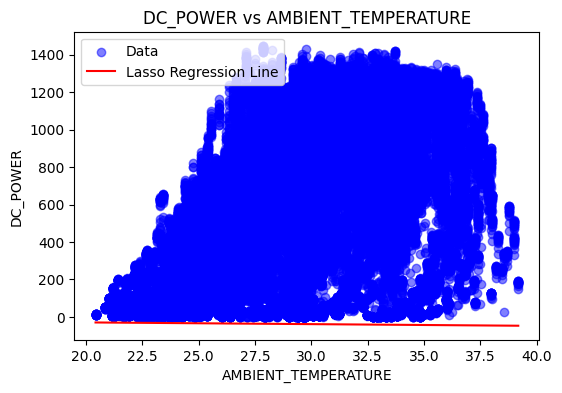

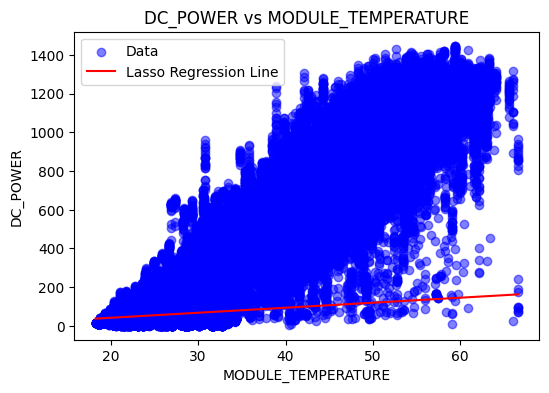

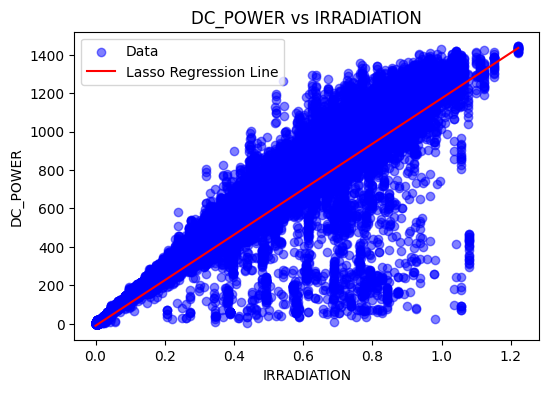

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# -----------------------------
# 1. Select features + target
# -----------------------------
X = df_merged[["AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION"]]
y = df_merged["DC_POWER"]


# -----------------------------
# 3. Train–test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 4. Create and train Lasso model
# -----------------------------
alpha_value = 0.1  # adjust regularization strength
model = Lasso(alpha=alpha_value)
model.fit(X_train, y_train)

# -----------------------------
# 5. Predictions
# -----------------------------
y_pred = model.predict(X_test)

# -----------------------------
# 6. Evaluation
# -----------------------------
print("R² score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# -----------------------------
# 7. Model coefficients
# -----------------------------
coeff_table = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print(coeff_table)
print("Intercept:", model.intercept_)

# -----------------------------
# 8. Scatter plots with regression lines
# -----------------------------
for feature in X.columns:
    plt.figure(figsize=(6,4))
    
    # Scatter plot
    plt.scatter(df_merged[feature], df_merged["DC_POWER"], color='blue', alpha=0.5, label="Data")
    
    # Regression line
    coef = model.coef_[X.columns.get_loc(feature)]
    intercept = model.intercept_
    x_vals = np.linspace(df_merged[feature].min(), df_merged[feature].max(), 100)
    y_vals = coef * x_vals + intercept
    plt.plot(x_vals, y_vals, color='red', label="Lasso Regression Line")
    
    plt.xlabel(feature)
    plt.ylabel("DC_POWER")
    plt.title(f"DC_POWER vs {feature}")
    plt.legend()
    plt.show()



Model training and evaluation: Nueral network

C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
R² score: 0.9264176014467556
MSE: 10763.040412472403
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


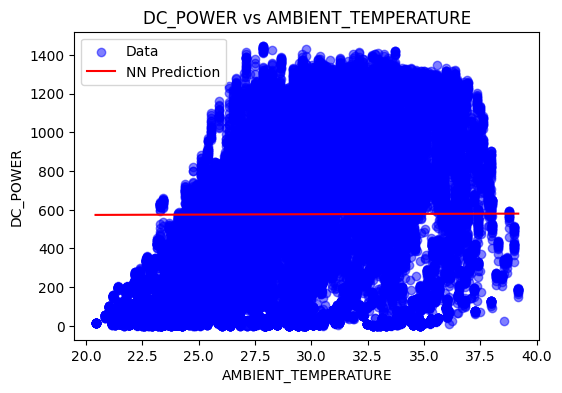

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


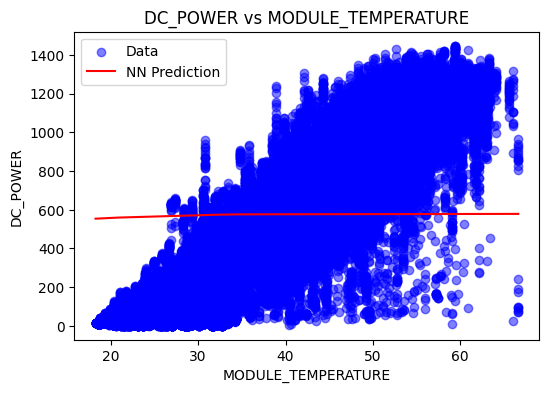

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


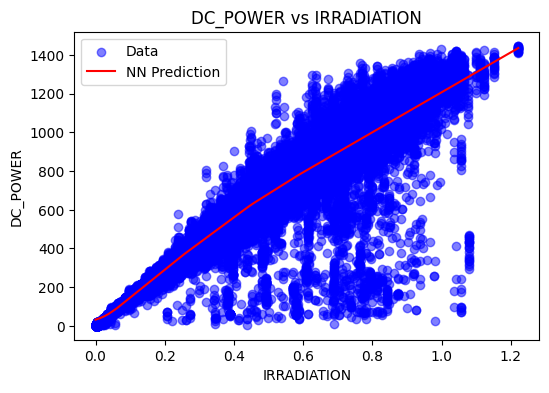

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# -----------------------------
# 1. Select features + target
# -----------------------------
X = df_merged[["AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION"]]
y = df_merged["DC_POWER"]


# -----------------------------
# 3. Train–test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 4. Feature scaling
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 5. Create neural network model
# -----------------------------
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # output layer for regression
])

model.compile(optimizer='adam', loss='mse')

# -----------------------------
# 6. Train the model
# -----------------------------
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=128, 
                    validation_split=0.2, verbose=0)

# -----------------------------
# 7. Predictions
# -----------------------------
y_pred = model.predict(X_test_scaled).flatten()

# -----------------------------
# 8. Evaluation
# -----------------------------
print("R² score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# -----------------------------
# 9. Scatter plots with predicted line
# -----------------------------
for i, feature in enumerate(X.columns):
    plt.figure(figsize=(6,4))
    
    # Scatter plot
    plt.scatter(df_merged[feature], df_merged["DC_POWER"], color='blue', alpha=0.5, label="Data")
    
    # Neural network predicted line (using only this feature scaled)
    x_vals = np.linspace(df_merged[feature].min(), df_merged[feature].max(), 100)
    
    # Create input matrix where only this feature varies, others set to mean
    X_line = np.tile(X_train.mean().values, (100,1))
    X_line[:, i] = x_vals
    X_line_scaled = scaler.transform(X_line)
    y_vals = model.predict(X_line_scaled).flatten()
    
    plt.plot(x_vals, y_vals, color='red', label="NN Prediction")
    
    plt.xlabel(feature)
    plt.ylabel("DC_POWER")
    plt.title(f"DC_POWER vs {feature}")
    plt.legend()
    plt.show()


MODEL COMPARISON

all models are calculated again with scaled datasets and a comparison is presented

C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


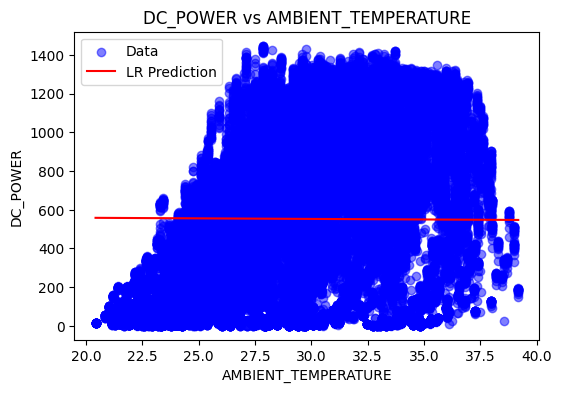

C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


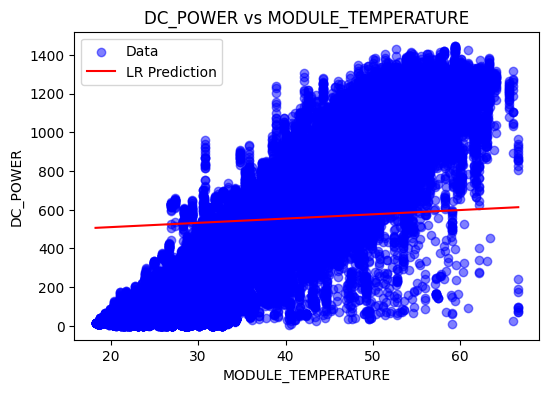

C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


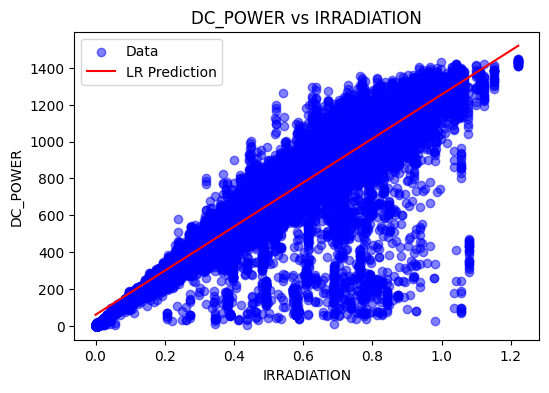

C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


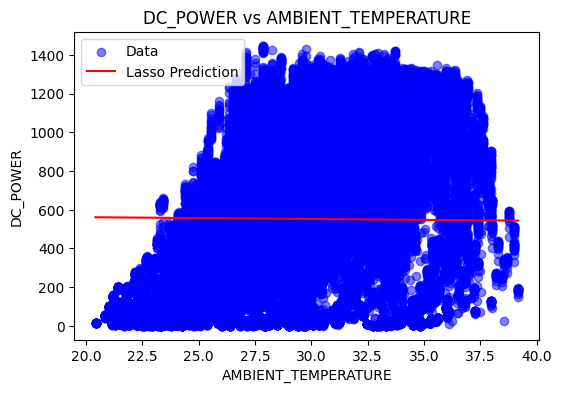

C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


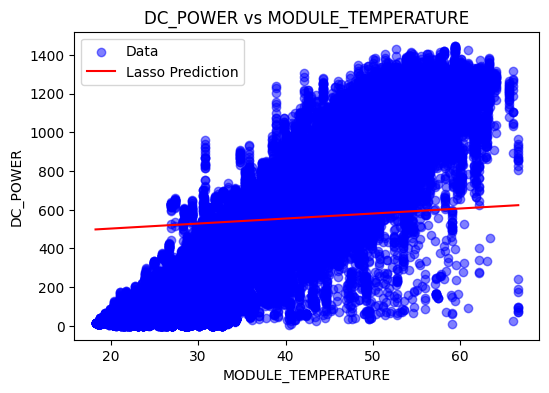

C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


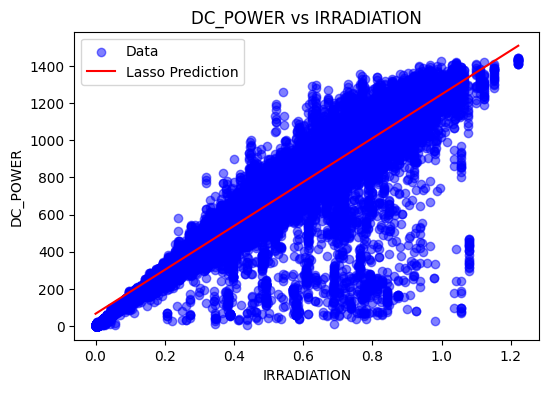

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


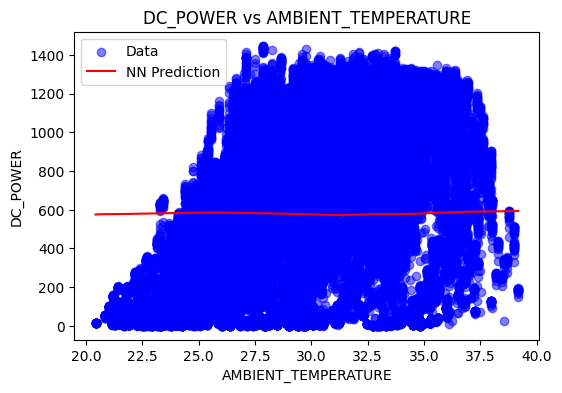

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


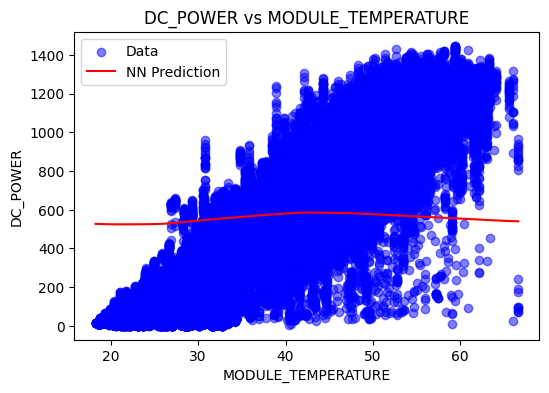

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


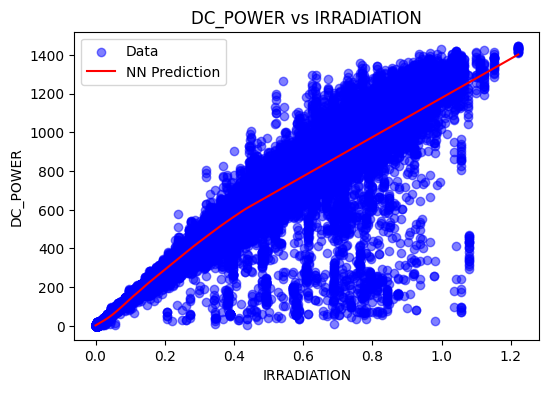

C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


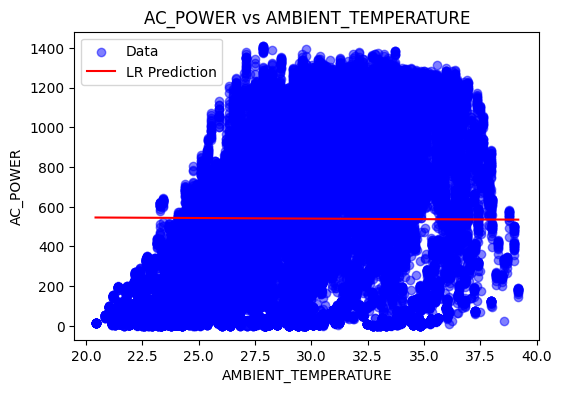

C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


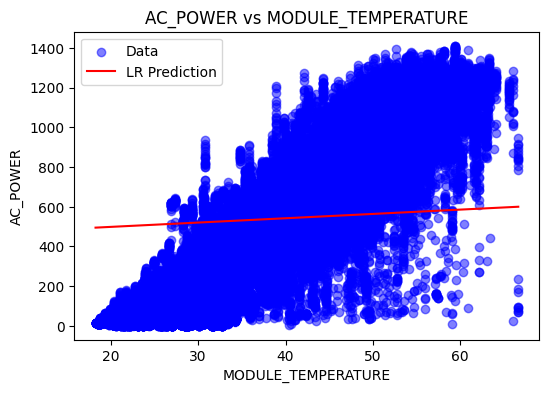

C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


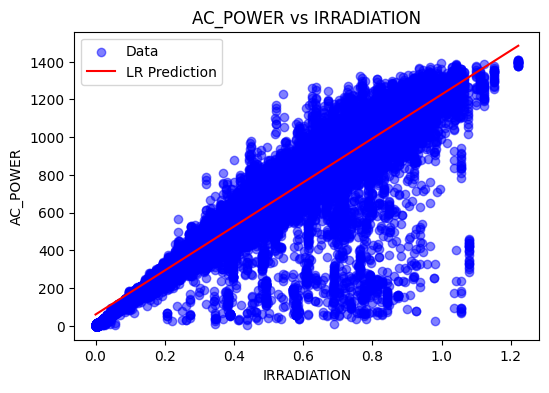

C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


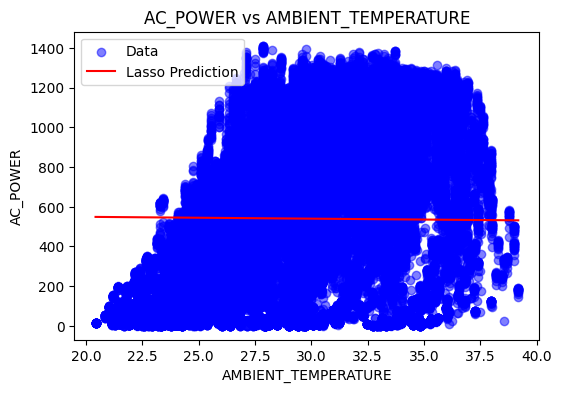

C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


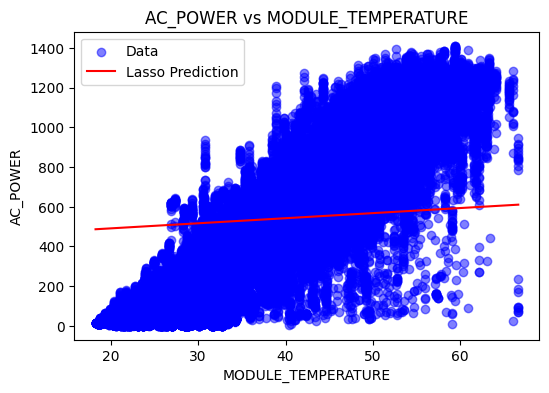

C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


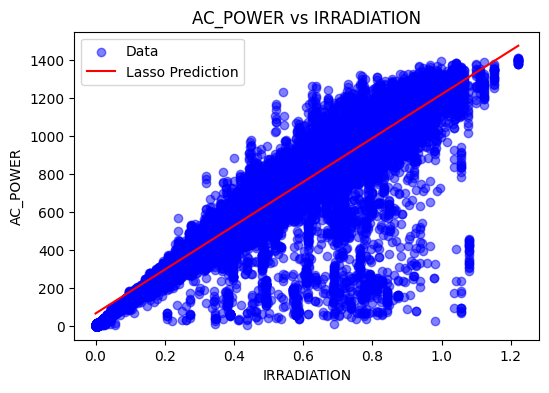

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


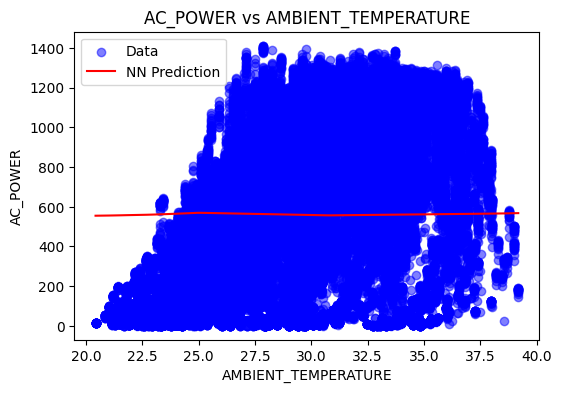

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


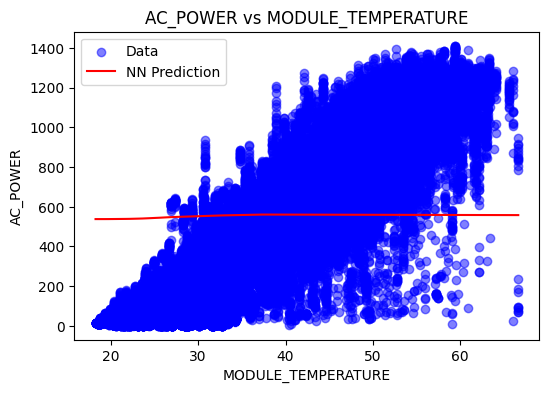

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


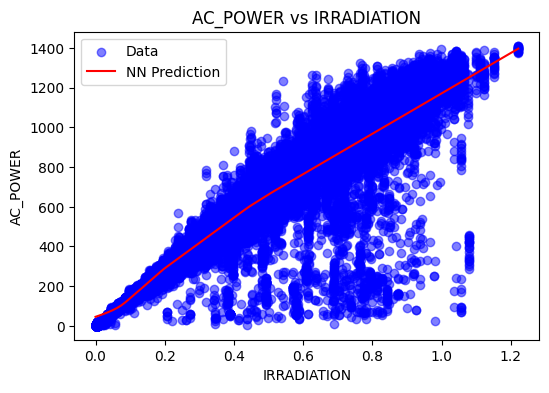


Model Performance Comparison:
     Target  Linear R2    Linear MSE  Lasso R2     Lasso MSE     NN R2  \
0  DC_POWER   0.923514  11187.755145  0.923510  11188.283616  0.926136   
1  AC_POWER   0.923302  10692.344072  0.923298  10692.876088  0.926459   

         NN MSE  
0  10804.184141  
1  10252.101031  


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# -----------------------------
# 1. Features
# -----------------------------
features = ["AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION"]

# -----------------------------
# 2. Targets
# -----------------------------
targets = ["DC_POWER", "AC_POWER"]

# -----------------------------
# 3. Train-test split and preprocessing function
# -----------------------------

def prepare_data(target):
    X = df_merged[features]
    y = df_merged[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, scaler


# -----------------------------
# 4. Model training functions
# -----------------------------
def train_linear(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def train_lasso(X_train, y_train, alpha=0.1):
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    return model

def train_nn(X_train_scaled, y_train, epochs=30, batch_size=128):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, 
              validation_split=0.2, verbose=0)
    return model

# -----------------------------
# 5. Evaluation function
# -----------------------------
def evaluate_model(model, X_test, y_test, model_type, X_train_mean=None, scaler=None):
    if model_type == "NN":
        y_pred = model.predict(X_test).flatten()
    else:
        y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    return y_pred, r2, mse

# -----------------------------
# 6. Scatter plot function
# -----------------------------
def plot_predictions(model, X_train, X_test, y_test, target, model_type, scaler=None):
    for i, feature in enumerate(features):
        plt.figure(figsize=(6,4))
        plt.scatter(df_merged[feature], df_merged[target], color='blue', alpha=0.5, label="Data")
        
        x_vals = np.linspace(df_merged[feature].min(), df_merged[feature].max(), 100)
        
        # Create input matrix for plotting prediction line
        X_line = np.tile(X_train.mean().values, (100,1))
        X_line[:, i] = x_vals
        
        if model_type == "NN":
            X_line_scaled = scaler.transform(X_line)
            y_vals = model.predict(X_line_scaled).flatten()
            label_line = "NN Prediction"
        else:
            y_vals = model.predict(X_line)
            label_line = f"{model_type} Prediction"
        
        plt.plot(x_vals, y_vals, color='red', label=label_line)
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.title(f"{target} vs {feature}")
        plt.legend()
        plt.show()

# -----------------------------
# 7. Run experiments for all targets and models
# -----------------------------
results = []

for target in targets:
    X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, scaler = prepare_data(target)
    
    # Linear Regression
    lr_model = train_linear(X_train, y_train)
    _, r2_lr, mse_lr = evaluate_model(lr_model, X_test, y_test, "LR")
    
    # Lasso
    lasso_model = train_lasso(X_train, y_train, alpha=0.1)
    _, r2_lasso, mse_lasso = evaluate_model(lasso_model, X_test, y_test, "Lasso")
    
    # Neural Network
    nn_model = train_nn(X_train_scaled, y_train)
    _, r2_nn, mse_nn = evaluate_model(nn_model, X_test_scaled, y_test, "NN")
    
    # Save results
    results.append({
        "Target": target,
        "Linear R2": r2_lr,
        "Linear MSE": mse_lr,
        "Lasso R2": r2_lasso,
        "Lasso MSE": mse_lasso,
        "NN R2": r2_nn,
        "NN MSE": mse_nn
    })
    
    # Optional: scatter plots
    plot_predictions(lr_model, X_train, X_test, y_test, target, "LR")
    plot_predictions(lasso_model, X_train, X_test, y_test, target, "Lasso")
    plot_predictions(nn_model, X_train, X_test, y_test, target, "NN", scaler)

# -----------------------------
# 8. Display comparison table
# -----------------------------
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df)


BIAS-VARIANCE ANALYSIS


Learning curves for DC_POWER:


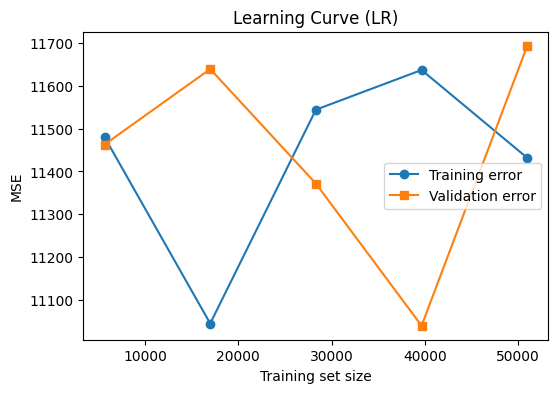

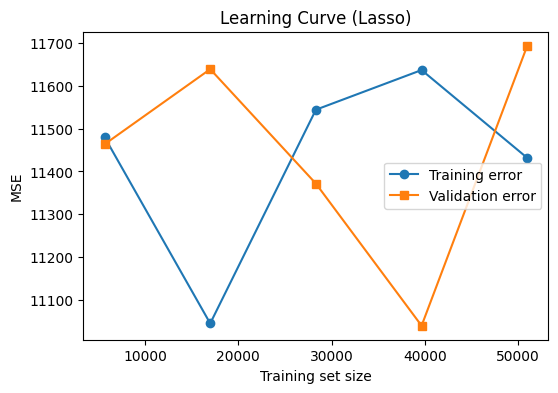

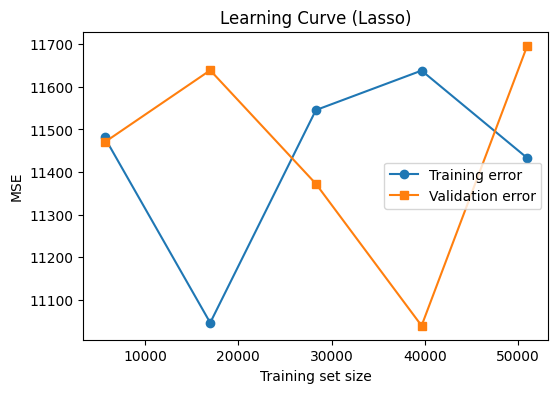

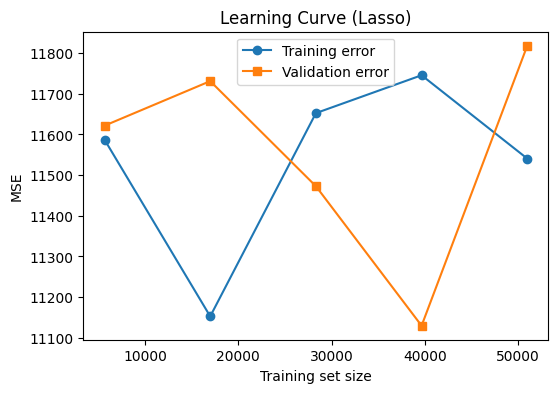

C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-p

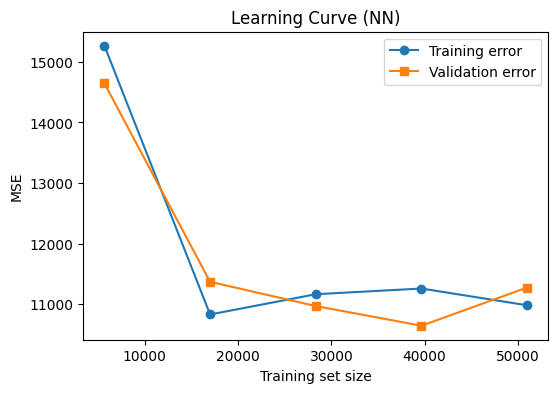


Learning curves for AC_POWER:


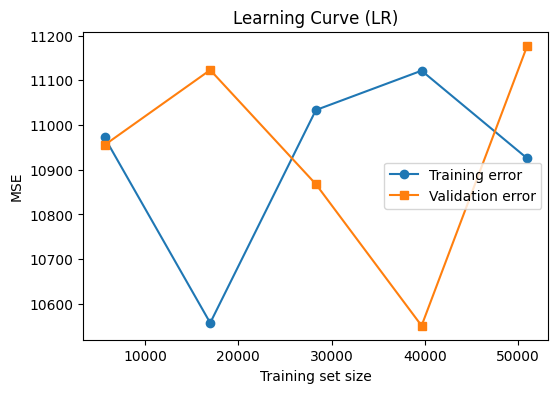

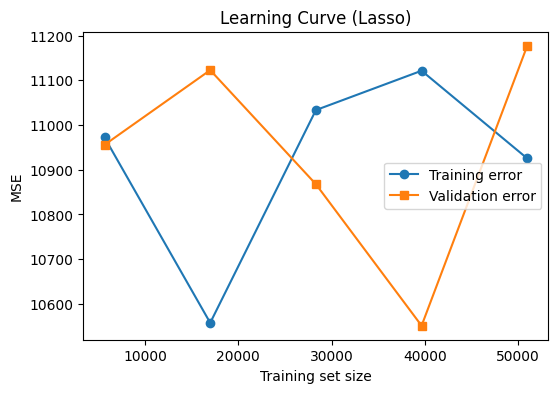

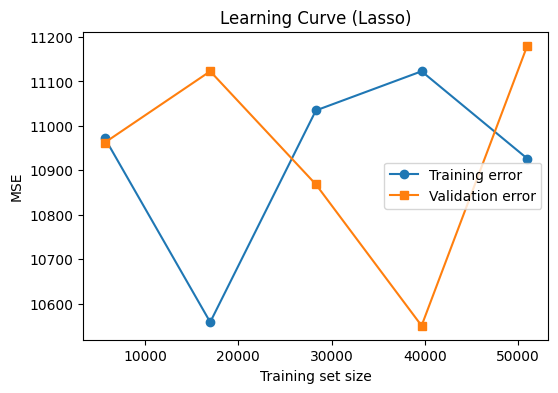

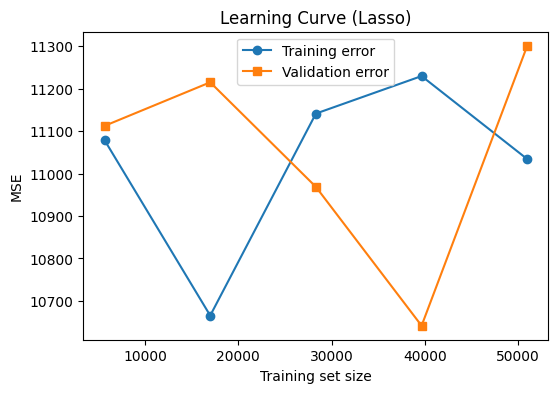

C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-p

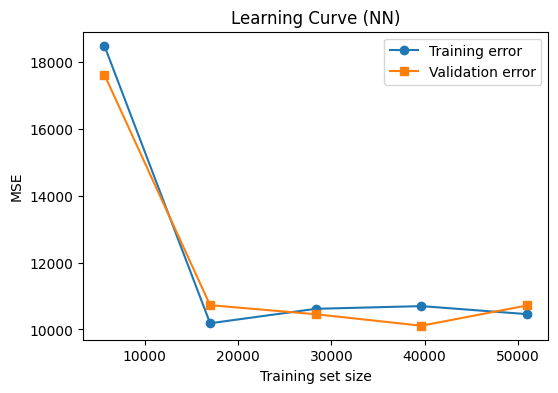

In [10]:
# -----------------------------
# 9. Fast learning curve function 
# -----------------------------
def plot_learning_curve(model_class, X, y, model_type, alpha=None, epochs=15, batch_size=64):
    """
    Faster learning curve: full dataset, reduced epochs/batch size for speed.
    """
    train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9]  # fractions of dataset
    train_errors = []
    val_errors = []

    for frac in train_sizes:
        frac = float(frac)
        X_frac, X_val, y_frac, y_val = train_test_split(X, y, train_size=frac, random_state=42)

        if model_type == "NN":
            scaler = StandardScaler()
            X_frac_scaled = scaler.fit_transform(X_frac)
            X_val_scaled = scaler.transform(X_val)

            nn_model = Sequential([
                Dense(32, activation='relu', input_shape=(X_frac_scaled.shape[1],)),
                Dense(16, activation='relu'),
                Dense(1)
            ])
            nn_model.compile(optimizer='adam', loss='mse')
            history = nn_model.fit(X_frac_scaled, y_frac, validation_data=(X_val_scaled, y_val),
                                   epochs=epochs, batch_size=batch_size, verbose=0)
            train_errors.append(history.history['loss'][-1])
            val_errors.append(history.history['val_loss'][-1])
        else:
            model = model_class(alpha=alpha) if model_type == "Lasso" else model_class()
            model.fit(X_frac, y_frac)
            y_train_pred = model.predict(X_frac)
            train_errors.append(mean_squared_error(y_frac, y_train_pred))
            y_val_pred = model.predict(X_val)
            val_errors.append(mean_squared_error(y_val, y_val_pred))

    plt.figure(figsize=(6,4))
    plt.plot([int(frac*len(X)) for frac in train_sizes], train_errors, marker='o', label='Training error')
    plt.plot([int(frac*len(X)) for frac in train_sizes], val_errors, marker='s', label='Validation error')
    plt.xlabel("Training set size")
    plt.ylabel("MSE")
    plt.title(f"Learning Curve ({model_type})")
    plt.legend()
    plt.show()


# -----------------------------
# 10. Run learning curves for each target and model (full dataset)
# -----------------------------
for target in targets:
    X = df_merged[features].fillna(df_merged[features].mean())
    y = df_merged[target].fillna(df_merged[target].mean())

    print(f"\nLearning curves for {target}:")

    # Linear Regression
    plot_learning_curve(LinearRegression, X, y, model_type="LR")

    # Lasso with different regularization strengths
    for alpha_val in [0.01, 0.1, 1.0]:
        plot_learning_curve(Lasso, X, y, model_type="Lasso", alpha=alpha_val)

    # Neural Network (fewer epochs, smaller batch for speed)
    plot_learning_curve(None, X, y, model_type="NN", epochs=15, batch_size=64)


Loss curve for NN

C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\b.yasser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-p

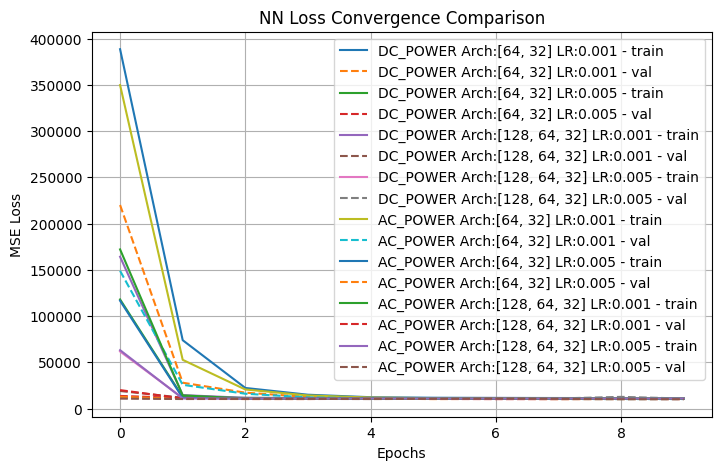

In [13]:
import tensorflow as tf

# -----------------------------
# 4b. Updated Neural Network Training with History
# -----------------------------
def train_nn(X_train_scaled, y_train, epochs=10, batch_size=128, lr=0.001, architecture=[64,32]):
    """
    Train a NN and return both model and training history.
    architecture: list of units in each hidden layer
    lr: learning rate
    """
    model = Sequential()
    # Add input + hidden layers
    for i, units in enumerate(architecture):
        if i == 0:
            model.add(Dense(units, activation='relu', input_shape=(X_train_scaled.shape[1],)))
        else:
            model.add(Dense(units, activation='relu'))
    # Output layer
    model.add(Dense(1))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='mse')

    history = model.fit(
        X_train_scaled, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        verbose=0
    )

    return model, history

# -----------------------------
# 6b. Plot NN Loss Curve
# -----------------------------
def plot_loss_curve(histories, labels=None, title="NN Loss Curve Comparison"):
    """
    histories: list of Keras History objects
    labels: list of strings for legends
    """
    plt.figure(figsize=(8,5))
    for i, history in enumerate(histories):
        label = labels[i] if labels else f"Run {i+1}"
        plt.plot(history.history['loss'], label=f"{label} - train")
        plt.plot(history.history['val_loss'], linestyle='--', label=f"{label} - val")
    plt.xlabel("Epochs")
    plt.ylabel("MSE Loss")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# -----------------------------
# 7b. Run experiments with multiple architectures / learning rates
# -----------------------------
nn_histories = []
nn_labels = []

for target in targets:
    X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled, scaler = prepare_data(target)

    # Example: try two architectures and two learning rates
    architectures = [[64,32], [128,64,32]]
    learning_rates = [0.001, 0.005]

    for arch in architectures:
        for lr in learning_rates:
            nn_model, nn_history = train_nn(X_train_scaled, y_train, epochs=10, batch_size=128, lr=lr, architecture=arch)
            nn_histories.append(nn_history)
            nn_labels.append(f"{target} Arch:{arch} LR:{lr}")

# Plot all loss curves for comparison
plot_loss_curve(nn_histories, labels=nn_labels, title="NN Loss Convergence Comparison")
